# Used Car price Predictions

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
sns.set(rc={'figure.figsize': [15, 9]}, font_scale=1.3)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV

## Loading the Used car prices and data

### Data Exploration

In [2]:
df = pd.read_csv('autos.csv')

In [3]:
df.head()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   index                371528 non-null  int64 
 1   dateCrawled          371528 non-null  object
 2   name                 371528 non-null  object
 3   seller               371528 non-null  object
 4   offerType            371528 non-null  object
 5   price                371528 non-null  int64 
 6   abtest               371528 non-null  object
 7   vehicleType          333659 non-null  object
 8   yearOfRegistration   371528 non-null  int64 
 9   gearbox              351319 non-null  object
 10  powerPS              371528 non-null  int64 
 11  model                351044 non-null  object
 12  kilometer            371528 non-null  int64 
 13  monthOfRegistration  371528 non-null  int64 
 14  fuelType             338142 non-null  object
 15  brand                371528 non-nu

### Outliners Checking for numerical Columns

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,371528.0,185763.500000,1.072510e+05,0.0,92881.75,185763.5,278645.25,3.715270e+05
price,371528.0,17295.141865,3.587954e+06,0.0,1150.00,2950.0,7200.00,2.147484e+09
yearOfRegistration,371528.0,2004.577997,9.286660e+01,1000.0,1999.00,2003.0,2008.00,9.999000e+03
powerPS,371528.0,115.549477,1.921396e+02,0.0,70.00,105.0,150.00,2.000000e+04
kilometer,371528.0,125618.688228,4.011234e+04,5000.0,125000.00,150000.0,150000.00,1.500000e+05
monthOfRegistration,371528.0,5.734445,3.712412e+00,0.0,3.00,6.0,9.00,1.200000e+01
nrOfPictures,371528.0,0.000000,0.000000e+00,0.0,0.00,0.0,0.00,0.000000e+00
postalCode,371528.0,50820.667640,2.579908e+04,1067.0,30459.00,49610.0,71546.00,9.999800e+04


### Checking Columns that are mostly are the same value
_this means they won't really increase the prediction of the model, they would only worsen it_

In [6]:
df.describe(include='O').T

,count,unique,top,freq
dateCrawled,371528,280500,2016-03-24 14:49:47,7
name,371528,233531,Ford_Fiesta,657
seller,371528,2,privat,371525
offerType,371528,2,Angebot,371516
abtest,371528,2,test,192585
vehicleType,333659,8,limousine,95894
gearbox,351319,2,manuell,274214
model,351044,251,golf,30070
fuelType,338142,7,benzin,223857
brand,371528,40,volkswagen,79640


### Checking for Null values and Duplications and removing them

In [7]:
df.isnull().sum()

index                      0
dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

index                  0
dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
nrOfPictures           0
postalCode             0
lastSeen               0
dtype: int64

### Taking a look on object type Columns
_to see which I will remove and which I will preprocess_

In [11]:
df.describe(include='O').T

,count,unique,top,freq
dateCrawled,260956,213628,2016-03-08 15:50:29,5
name,260956,150361,BMW_318i,619
seller,260956,2,privat,260954
offerType,260956,2,Angebot,260952
abtest,260956,2,test,135518
vehicleType,260956,8,limousine,76394
gearbox,260956,2,manuell,200059
model,260956,250,golf,20958
fuelType,260956,7,benzin,169242
brand,260956,39,volkswagen,54194


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260956 entries, 3 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   index                260956 non-null  int64 
 1   dateCrawled          260956 non-null  object
 2   name                 260956 non-null  object
 3   seller               260956 non-null  object
 4   offerType            260956 non-null  object
 5   price                260956 non-null  int64 
 6   abtest               260956 non-null  object
 7   vehicleType          260956 non-null  object
 8   yearOfRegistration   260956 non-null  int64 
 9   gearbox              260956 non-null  object
 10  powerPS              260956 non-null  int64 
 11  model                260956 non-null  object
 12  kilometer            260956 non-null  int64 
 13  monthOfRegistration  260956 non-null  int64 
 14  fuelType             260956 non-null  object
 15  brand                260956 non-nu

In [13]:
df['fuelType'].value_counts()

benzin     169242
diesel      86974
lpg          3937
cng           460
hybrid        213
andere         73
elektro        57
Name: fuelType, dtype: int64

In [14]:
df['nrOfPictures'].value_counts()

0    260956
Name: nrOfPictures, dtype: int64

In [15]:
df['name'].head(10)

3                                    GOLF_4_1_4__3TÜRER
4                        Skoda_Fabia_1.4_TDI_PD_Classic
5     BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...
6                           Peugeot_206_CC_110_Platinum
7                          VW_Derby_Bj_80__Scheunenfund
10                                    Mazda_3_1.6_Sport
11        Volkswagen_Passat_Variant_2.0_TDI_Comfortline
14    Nissan_Navara_2.5DPF_SE4x4_Klima_Sitzheizg_Blu...
17                          Renault_Twingo_1.2_16V_Aut.
18                     Ford_C_MAX_2.0_TDCi_DPF_Titanium
Name: name, dtype: object

### Removing harmful data
_after checking i'm removing all columns that are either filled with data that aren't organised or collumns that only have one dominating unique object_

### DateTime data conversion
_Changing date time columns to datatime type then exctracting the year as it's what matter on these columns and truning them back to type int_

In [16]:
df= df.drop('index',1)
df= df.drop('nrOfPictures',1)
df= df.drop('name',1)
df= df.drop('seller',1)
df['dateCrawled'] = pd.to_datetime(df['dateCrawled'],format='%Y-%m-%d')
df['lastSeen'] = pd.to_datetime(df['lastSeen'],format='%Y-%m-%d')
df['dateCreated'] = pd.to_datetime(df['dateCreated'],format='%Y-%m-%d')

C:\Users\del10\AppData\Local\Temp\ipykernel_11624\1977305421.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df= df.drop('index',1)
C:\Users\del10\AppData\Local\Temp\ipykernel_11624\1977305421.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df= df.drop('nrOfPictures',1)
C:\Users\del10\AppData\Local\Temp\ipykernel_11624\1977305421.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df= df.drop('name',1)
C:\Users\del10\AppData\Local\Temp\ipykernel_11624\1977305421.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df= df.drop('seller',1)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260956 entries, 3 to 371527
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dateCrawled          260956 non-null  datetime64[ns]
 1   offerType            260956 non-null  object        
 2   price                260956 non-null  int64         
 3   abtest               260956 non-null  object        
 4   vehicleType          260956 non-null  object        
 5   yearOfRegistration   260956 non-null  int64         
 6   gearbox              260956 non-null  object        
 7   powerPS              260956 non-null  int64         
 8   model                260956 non-null  object        
 9   kilometer            260956 non-null  int64         
 10  monthOfRegistration  260956 non-null  int64         
 11  fuelType             260956 non-null  object        
 12  brand                260956 non-null  object        
 13  notRepairedDam

In [18]:
df['dateCrawled']=df.dateCrawled.dt.strftime('%Y')
df['dateCreated']=df.dateCreated.dt.strftime('%Y')
df['lastSeen']=df.lastSeen.dt.strftime('%Y')
df['lastSeen']=df['lastSeen'].astype(int)
df['dateCreated']=df['dateCreated'].astype(int)
df['dateCrawled']=df['dateCrawled'].astype(int)

In [19]:
df.head()

,dateCrawled,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
3,2016,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016,91074,2016
4,2016,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016,60437,2016
5,2016,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016,33775,2016
6,2016,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016,67112,2016
7,2016,Angebot,0,test,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,2016,19348,2016


### Outliers investigation
_checking the columns that showed signs of outliers when i checked the data description_

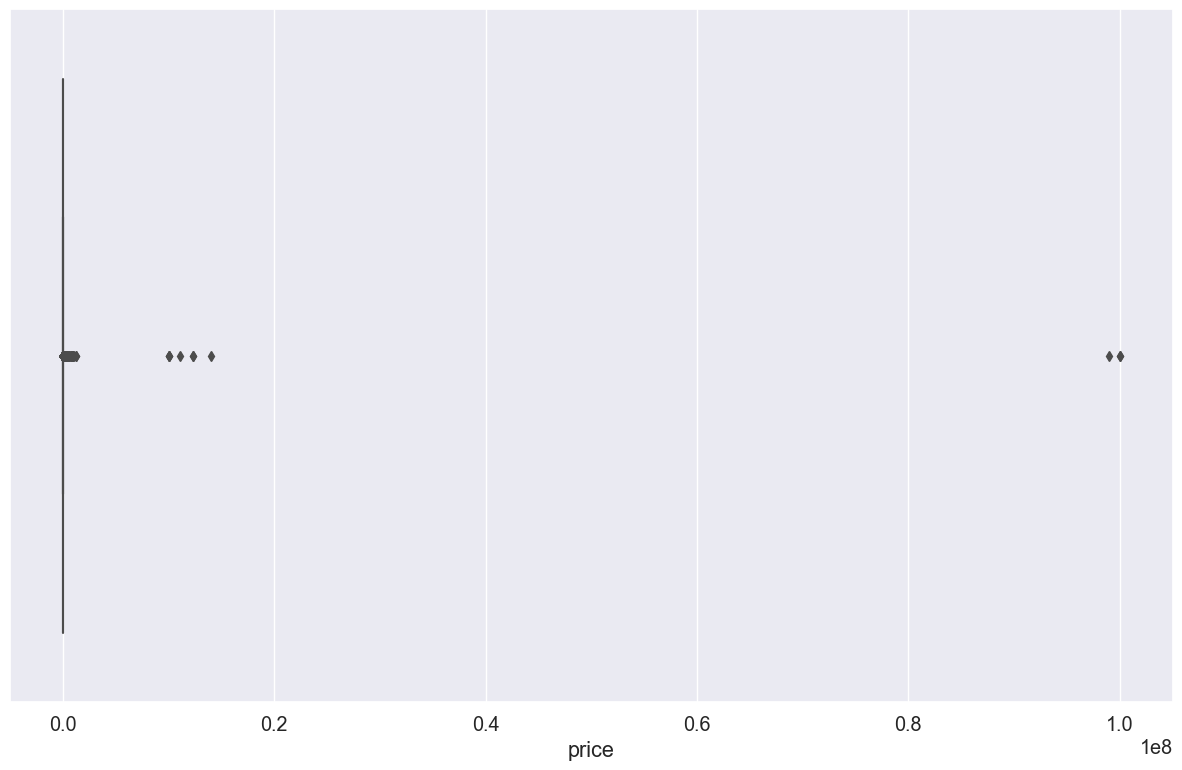

In [20]:
sns.boxplot(x='price',data=df);

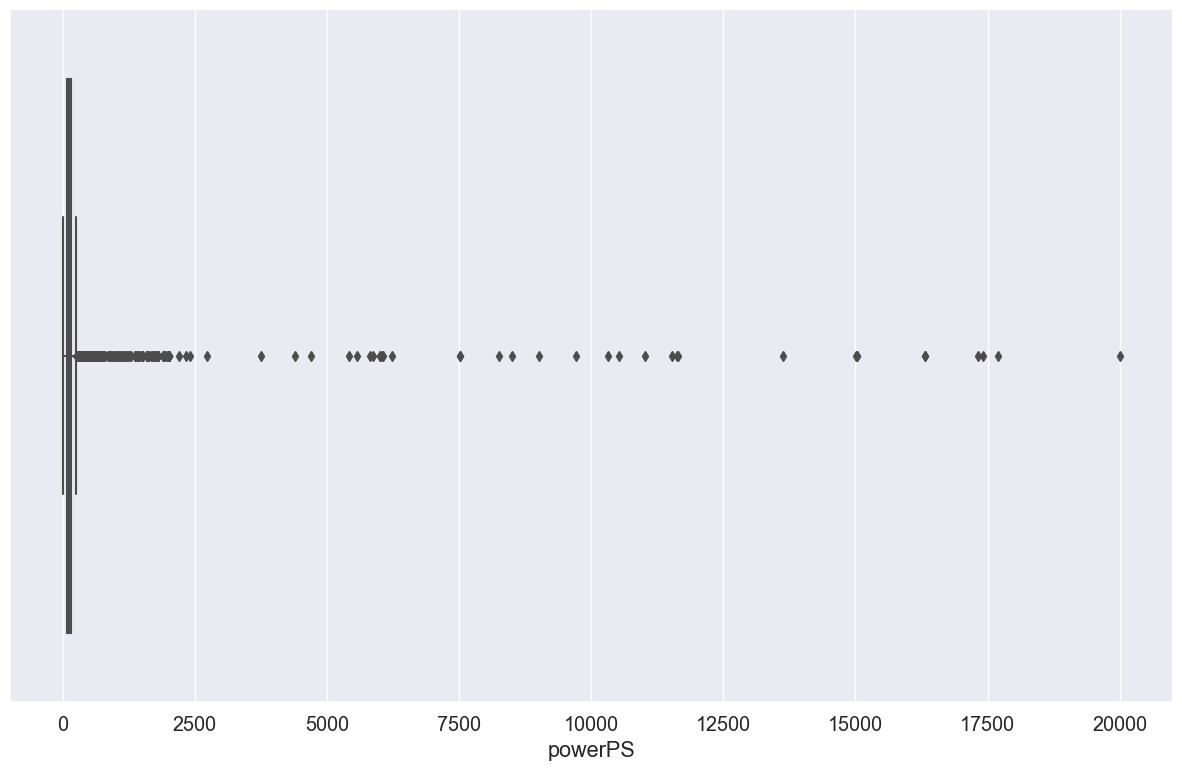

In [21]:
sns.boxplot(x='powerPS',data=df);

### Outliers Handling
_after seeing that we have outliers issues, I'm gonna handle it by using IQR method as I cant scale the target column_

In [22]:
df.corr()

C:\Users\del10\AppData\Local\Temp\ipykernel_11624\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,dateCrawled,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,dateCreated,postalCode,lastSeen
dateCrawled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,NaN,1.000000,0.010434,0.008640,-0.013932,0.004747,-0.000055,0.001311,NaN
yearOfRegistration,NaN,0.010434,1.000000,0.102431,-0.395198,0.033529,-0.004085,0.046489,NaN
powerPS,NaN,0.008640,0.102431,1.000000,-0.016951,0.015070,-0.000358,0.026808,NaN
kilometer,NaN,-0.013932,-0.395198,-0.016951,1.000000,-0.006263,0.005891,-0.032874,NaN
monthOfRegistration,NaN,0.004747,0.033529,0.015070,-0.006263,1.000000,0.002116,0.004023,NaN
dateCreated,NaN,-0.000055,-0.004085,-0.000358,0.005891,0.002116,1.000000,0.001620,NaN
postalCode,NaN,0.001311,0.046489,0.026808,-0.032874,0.004023,0.001620,1.000000,NaN
lastSeen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
    Q1= df['powerPS'].quantile(0.25)
    Q3= df['powerPS'].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.2 * IQR
    lower_bound = Q1 - 1.2 * IQR
    df=df.drop(df[(df['powerPS']>=upper_bound)].index)
    df=df.drop(df[(df['powerPS']<=lower_bound)].index)

In [24]:
    Q1= df['price'].quantile(0.25)
    Q3= df['price'].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.2 * IQR
    lower_bound = Q1 - 1.2 * IQR
    df=df.drop(df[(df['price']>=upper_bound)].index)
    df=df.drop(df[(df['price']<=lower_bound)].index)

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
dateCrawled,228422.0,2016.000000,0.000000,2016.0,2016.0,2016.0,2016.0,2016.0
price,228422.0,4382.177317,3789.746749,0.0,1390.0,3100.0,6500.0,15500.0
yearOfRegistration,228422.0,2002.589768,5.994791,1910.0,1999.0,2003.0,2007.0,2018.0
powerPS,228422.0,110.704656,48.450964,0.0,75.0,107.0,141.0,236.0
kilometer,228422.0,128975.536507,35684.881766,5000.0,125000.0,150000.0,150000.0,150000.0
monthOfRegistration,228422.0,6.164472,3.483214,0.0,3.0,6.0,9.0,12.0
dateCreated,228422.0,2015.999917,0.009120,2015.0,2016.0,2016.0,2016.0,2016.0
postalCode,228422.0,51279.981819,25819.055878,1067.0,30890.0,50667.0,72149.0,99998.0
lastSeen,228422.0,2016.000000,0.000000,2016.0,2016.0,2016.0,2016.0,2016.0


### Dropping colums with low correlation
_droping columns that won't help with the prediction_

In [27]:
df.corr()

C:\Users\del10\AppData\Local\Temp\ipykernel_11624\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,dateCrawled,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,dateCreated,postalCode,lastSeen
dateCrawled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,NaN,1.000000,0.562579,0.434402,-0.369046,0.046805,-0.003398,0.061752,NaN
yearOfRegistration,NaN,0.562579,1.000000,0.163702,-0.323527,0.036212,-0.003267,0.032653,NaN
powerPS,NaN,0.434402,0.163702,1.000000,0.137041,0.044050,0.000034,0.069109,NaN
kilometer,NaN,-0.369046,-0.323527,0.137041,1.000000,-0.006632,0.004850,-0.006766,NaN
monthOfRegistration,NaN,0.046805,0.036212,0.044050,-0.006632,1.000000,0.003187,0.005411,NaN
dateCreated,NaN,-0.003398,-0.003267,0.000034,0.004850,0.003187,1.000000,0.002049,NaN
postalCode,NaN,0.061752,0.032653,0.069109,-0.006766,0.005411,0.002049,1.000000,NaN
lastSeen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df= df.drop('monthOfRegistration',1)
df= df.drop('postalCode',1)

C:\Users\del10\AppData\Local\Temp\ipykernel_11624\509564426.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df= df.drop('monthOfRegistration',1)
C:\Users\del10\AppData\Local\Temp\ipykernel_11624\509564426.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df= df.drop('postalCode',1)


### Label Encoding
_need to encode all the labels to use liniar regression model_

In [29]:
le = LabelEncoder()
df['offerType']=le.fit_transform(df['offerType'])
df['vehicleType']=le.fit_transform(df['vehicleType'])
df['gearbox']=le.fit_transform(df['gearbox'])
df['model']=le.fit_transform(df['model'])
df['fuelType']=le.fit_transform(df['fuelType'])
df['fuelType']=le.fit_transform(df['fuelType'])
df['brand']=le.fit_transform(df['brand'])
df['notRepairedDamage']=le.fit_transform(df['notRepairedDamage'])
df['abtest']=le.fit_transform(df['abtest'])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228422 entries, 3 to 371525
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   dateCrawled         228422 non-null  int32
 1   offerType           228422 non-null  int32
 2   price               228422 non-null  int64
 3   abtest              228422 non-null  int32
 4   vehicleType         228422 non-null  int32
 5   yearOfRegistration  228422 non-null  int64
 6   gearbox             228422 non-null  int32
 7   powerPS             228422 non-null  int64
 8   model               228422 non-null  int32
 9   kilometer           228422 non-null  int64
 10  fuelType            228422 non-null  int64
 11  brand               228422 non-null  int32
 12  notRepairedDamage   228422 non-null  int32
 13  dateCreated         228422 non-null  int32
 14  lastSeen            228422 non-null  int32
dtypes: int32(10), int64(5)
memory usage: 19.2 MB


### Data Spliting
_spliting the data to inputs and Target, then spliting them with a ration off 75:25 for training and testing_

In [31]:
x=df.drop('price',1)
y=df['price']

C:\Users\del10\AppData\Local\Temp\ipykernel_11624\2222881566.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x=df.drop('price',1)


In [32]:
X_train,X_test, y_train,y_test = train_test_split(x,y,test_size = 0.25,shuffle = True ,random_state = 300)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((171316, 14), (57106, 14), (171316,), (57106,))

### Performance function

In [33]:
def performance(model,X_train,y_train,y_pred,y_test):
    print('Training Score:',model.score(X_train,y_train))
    print('Testing Score:',r2_score(y_test,y_pred))
    print('Other Metrics In Testing Data: ')
    print('MSE:',mean_squared_error(y_test,y_pred))
    print('MAE:',mean_absolute_error(y_test,y_pred))

### Liniar regression
_model scores are very low, it seems it's not the model for this problem_

In [34]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
performance(lr,X_train,y_train,lr_pred,y_test)

Training Score: 0.5471166123060651
Testing Score: 0.5494478535324563
Other Metrics In Testing Data: 
MSE: 6437800.102368583
MAE: 1851.405336424692


### Ridge model
_Same results as Liniar model_

In [35]:
ridge = Ridge(alpha = 1)
ridge.fit(X_train,y_train)
ridge_pred = ridge.predict(X_test)
performance(ridge,X_train,y_train,ridge_pred,y_test)

Training Score: 0.5471160876591745
Testing Score: 0.5494530130400644
Other Metrics In Testing Data: 
MSE: 6437726.379762068
MAE: 1851.3727113453367


### Decision Tree Model
_The model seems to be overfitting but maybe with some hyperparamter tuning I can fix that_

In [36]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)
performance(dt,X_train,y_train,dt_pred,y_test)

Training Score: 0.9591007034398719
Testing Score: 0.7893087636375008
Other Metrics In Testing Data: 
MSE: 3010501.833488369
MAE: 1050.9028443224067


### Random Forest
_Model seems to be giving Decent Results with 85% accuracy on test_

In [37]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train.values.ravel())
rf_pred = rf.predict(X_test)
performance(rf,X_train,y_train,rf_pred,y_test)

Training Score: 0.9479125781110225
Testing Score: 0.8557163034040858
Other Metrics In Testing Data: 
MSE: 2061625.061600293
MAE: 915.0085526081589


### Hyperparamters tuning
_the results of the D_tree hyperparamters tuning using Random Search Cross Validation seems to be the same as the Random forest model but the problem of the overfitting is solved_

In [38]:
params = [{'max_depth':list(range(5,20)),'min_samples_split':list(range(2,15)),"min_samples_leaf":[2,3,4,5]}]
dt_w_rand_search = RandomizedSearchCV(DecisionTreeRegressor(),params,cv=10,n_jobs=-1)
dt_w_rand_search.fit(X_train,y_train)
dt_rand_pred = dt_w_rand_search.predict(X_test)
print('Best Estimator:',dt_w_rand_search.best_estimator_)
print('Best Params:',dt_w_rand_search.best_params_)
performance(dt_w_rand_search,X_train,y_train,dt_rand_pred,y_test)

Best Estimator: DecisionTreeRegressor(max_depth=19, min_samples_leaf=5, min_samples_split=10)
Best Params: {'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 19}
Training Score: 0.8964410266292427
Testing Score: 0.831821381118429
Other Metrics In Testing Data: 
MSE: 2403052.2068103813
MAE: 983.4323892493923


# Conclusion

After trying different models and hyperparamters tuning, the best model for such data is Random Forest Model with Accuracy of 85% on Test data